<a href="https://colab.research.google.com/github/rodrigofardin/Reconhecimento-de-Padroes/blob/main/RegressaoLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Carregando uma base de dados de regressão que NÃO esteja nos toy datasets do scikit-learn;

Para este exemplo foi gerado um dataset artificial utilizando o módulo make_regression do Sklearn

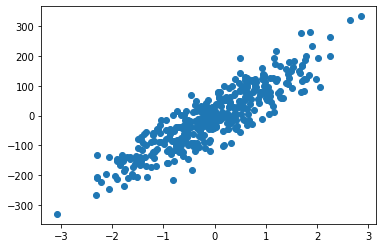

92.65387090440508


In [114]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
X, y, coef = make_regression(n_samples=400, n_features=1, noise=50, random_state=7, coef=True)
plt.scatter(X, y)
plt.show()
print(coef)

Criando as matrizes de dados X e y

In [115]:
print(X.shape, y.shape)


(400, 1) (400,)



**Modelo de Regressão Linear**

Definindo o modelo de regressão

In [116]:
from sklearn import linear_model
modelo = linear_model.LinearRegression()

Treinando modelo

In [125]:
modelo.fit(X, y)
ypred = modelo.predict(X)
ypred.shape

(400,)

Visualização da reta de regressão linear que o modelo gerou, com os mesmos dados que criaram o modelo.

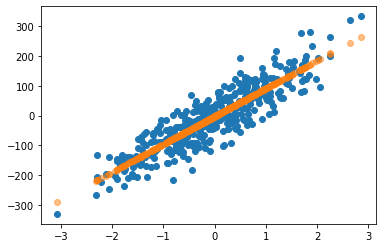

In [118]:
plt.scatter(X, y)
plt.scatter(X, ypred, alpha=0.5)

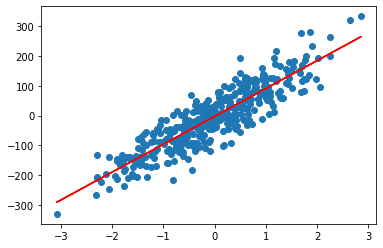

In [119]:
plt.scatter(X, y)
plt.plot(X, ypred, 'r')

Calculando o MSE (Erro Quadrático Médio)

In [120]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, ypred)
print(mse)

2266.1157262491392


Calculando o MAE (Erro Absoluto Médio)


In [121]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y, ypred)
print(mae)

38.44028134120137


Calculando o RMSE (Raiz Quadrada do Erro Médio)

In [122]:
rmse = mean_squared_error(y, ypred, squared=False)
print(rmse)

47.603736473612436


Utilizando os atributos *coef_* e *intercept_* do modelo, sendo eles respectivamente o coeficiente angular e linear de nossa reta

In [123]:
print(modelo.intercept_,'\n', modelo.coef_)

-2.5718702410144587 
 [93.62541015]


Plotando um gráfico (2D) do MSE em função do atributo intercept_ da classe LinearRegression. Mantendo os valores do atributo coef_ fixos e variando o valor de intercept_ entre intercept_ - delta e intercept_ + delta.

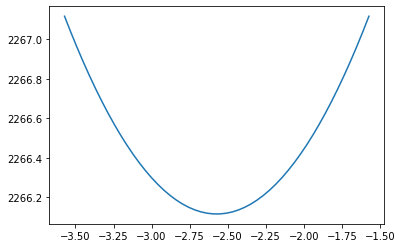

In [124]:
import numpy as np

def plot(delta):
  erros = []
  intercept = modelo.intercept_
  ws = np.linspace(intercept-delta, intercept+delta)
  for w in ws:
    modelo.intercept_= w
    ypred = modelo.predict(X)
    erro = mean_squared_error(y, ypred)
    erros.append(erro)
  modelo.intercept_ = intercept
  plt.plot(ws, erros)
  plt.show()

plot(1)